# 앙상블 (Ensemble)

- 다양한 모델을 결합하여 예측 성능을 향상시키는 방법
- 투표(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 네가지로 구분

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 출력문 warning 제거 (무시)
import warnings
warnings.filterwarnings("ignore")

### Voting

- hard voting : 여러 개의 예측치에 대해 다수결로 결정
- soft voting : 여러 개의 예측 확률을 평균내어 결정

In [4]:
from sklearn.datasets import load_breast_cancer

bc_ds = load_breast_cancer()

df = pd.DataFrame(data=bc_ds.data, columns=bc_ds.feature_names)
df[bc_ds.target_names[0]] = bc_ds.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [52]:

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [6]:
df['malignant'].value_counts()

malignant
1    357
0    212
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    bc_ds.data, bc_ds.target, test_size=0.2, random_state=42
)

##### hard voting

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('knn', knn_clf),
        ('lr', lr_clf),
        ('dt', dt_clf)
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.9648351648351648
Testing Accuracy: 0.956140350877193


In [16]:
start, end = 40, 50

voting_clf_pred = voting_clf.predict(X_test[start:end])
print(f"VotingClassifier 예측값 {voting_clf_pred}")

for classifier in (knn_clf, lr_clf, dt_clf):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, pred)
    
    class_name = classifier.__class__.__name__
    print(f"{class_name} 개별 정확도: {acc_score:.4f}")
    print(f"{class_name} 예측값: {pred[start:end]}")

VotingClassifier 예측값 [1 0 1 1 1 1 1 1 1 1]
KNeighborsClassifier 개별 정확도: 0.9561
KNeighborsClassifier 예측값: [1 0 1 1 1 1 1 1 1 1]
LogisticRegression 개별 정확도: 0.9474
LogisticRegression 예측값: [1 0 1 1 1 1 1 1 1 1]
DecisionTreeClassifier 개별 정확도: 0.9298
DecisionTreeClassifier 예측값: [1 0 1 1 1 1 0 1 1 1]


##### soft voting

In [17]:
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('knn', knn_clf),
        ('lr', lr_clf),
        ('dt', dt_clf)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.9802197802197802
Testing Accuracy: 0.9736842105263158


In [20]:
# soft voting 작동 원리 == 각 예측기의 확률값 평균
start, end = 40, 50

voting_clf_pred_proba = voting_clf.predict_proba(X_test[start:end])
# print(f"VotingClassifier 예측 확률값 {voting_clf_pred_proba}")

averages = np.full_like(voting_clf_pred_proba, 0)

for classifier in (knn_clf, lr_clf, dt_clf):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    acc_score = accuracy_score(y_test, pred)
    
    predict_proba = classifier.predict_proba(X_test[start:end])
    
    averages += predict_proba
    
    class_name = classifier.__class__.__name__
    print(f"{class_name} 개별 정확도: {acc_score:.4f}")
averages /= 3
# print(f"각 모델별 예측 확률값 평균: {averages}")
print(np.array_equal(voting_clf_pred_proba, averages))

KNeighborsClassifier 개별 정확도: 0.9561
LogisticRegression 개별 정확도: 0.9474
DecisionTreeClassifier 개별 정확도: 0.9386
True


### Bagging

- Bootstram Aggregation (각 estimator마다 훈련 데이터를 뽑을 때, 중복 값 허용하는 방식)
- 분류 모델의 경우, 각 estimator의 예측값을 다수결(hard voting) 결정
- 회귀 모델의 경우, 각 estimator의 예측값을 평균내어 결정

**RandomForest 하이퍼 파라미터**
| **하이퍼파라미터**      | **설명**                                                                                     | **기본값**      |
|--------------------------|--------------------------------------------------------------------------------------------|-----------------|
| `n_estimators`           | 생성할 트리의 개수 지정 (트리의 개수가 많을수록 성능이 좋아질 수 있지만 계산 비용 증가) | 100             |
| `criterion`              | 분할 품질을 측정하는 기준 (분류에서는 "gini" 또는 "entropy"를 사용)                 | "gini"          |
| `max_depth`              | 각 트리의 최대 깊이 (설정하지 않으면 트리는 잎 노드가 순수해질 때까지 계속 확장) | None            |
| `min_samples_split`      | 내부 노드를 분할하기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                   | 2               |
| `min_samples_leaf`       | 잎 노드가 되기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                          | 1               |
| `max_features`           | 각 트리를 분할할 때 고려할 최대 특성 수 ()"auto", "sqrt", "log2" 중 선택하거나, 특정 숫자 지정 가능) | "auto"          |
| `bootstrap`              | 각 트리를 만들 때 부트스트랩 샘플링을 사용할지 여부를 결정                               | True            |
| `random_state`           | 결과의 재현성을 위해 난수 시드 고정                                                  | None            |
| `n_jobs`                 | 병렬 계산을 위해 사용할 CPU 코어 수를 지정 (-1로 설정하면 모든 코어를 사용)           | None            |
| `class_weight`           | 각 클래스의 가중치를 자동으로 계산하거나 직접 지정 가능 (불균형 데이터 처리에 유용)    | None            |



In [21]:
from  sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=7, random_state=0)

rf_clf.fit(X_train, y_train)

rf_clf.score(X_train, y_train), rf_clf.score(X_test, y_test)

(0.9978021978021978, 0.9649122807017544)

In [23]:
rf_clf.estimators_
len(rf_clf.estimators_)

100

In [28]:
len(rf_clf.estimators_samples_)
len(rf_clf.estimators_samples_[0])
len(rf_clf.estimators_samples_[0]), len(rf_clf.estimators_samples_[10])

(455, 455)

In [32]:
rf_clf.feature_importances_

feat_impt_ser = pd.Series(rf_clf.feature_importances_, index=bc_ds.feature_names).sort_values(ascending=False)
feat_impt_ser

worst perimeter            0.130464
mean concave points        0.122366
worst radius               0.121160
worst concave points       0.117019
worst area                 0.081281
mean concavity             0.069395
mean perimeter             0.052851
mean area                  0.045718
worst concavity            0.033248
area error                 0.027998
radius error               0.023635
mean radius                0.022752
mean texture               0.017707
worst symmetry             0.014666
worst texture              0.014159
perimeter error            0.014035
worst compactness          0.011821
worst smoothness           0.011381
mean smoothness            0.009501
worst fractal dimension    0.008193
texture error              0.006803
fractal dimension error    0.006236
concavity error            0.005776
compactness error          0.005495
concave points error       0.005292
symmetry error             0.005159
mean compactness           0.004953
smoothness error           0

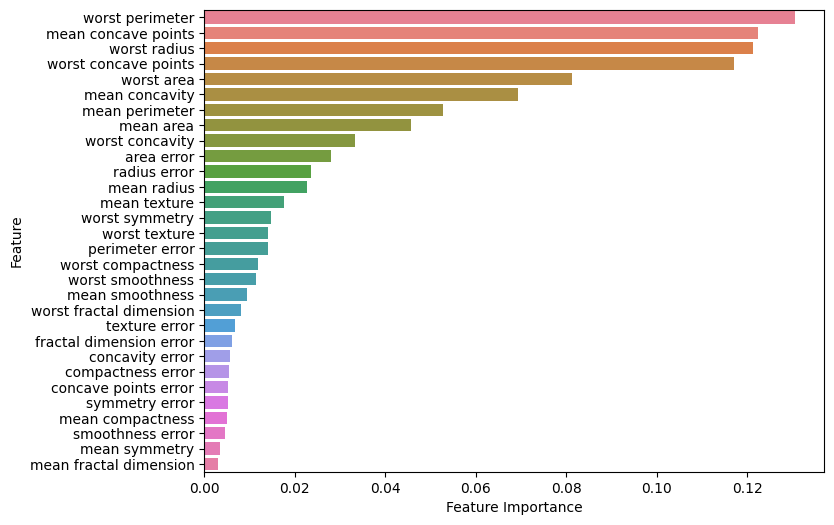

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x=feat_impt_ser.values, y=feat_impt_ser.index, hue=feat_impt_ser.index)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

##### [한번 해보기] 와인 데이터셋 이진 분류

In [40]:
df = pd.read_csv('./data/wine_simple.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


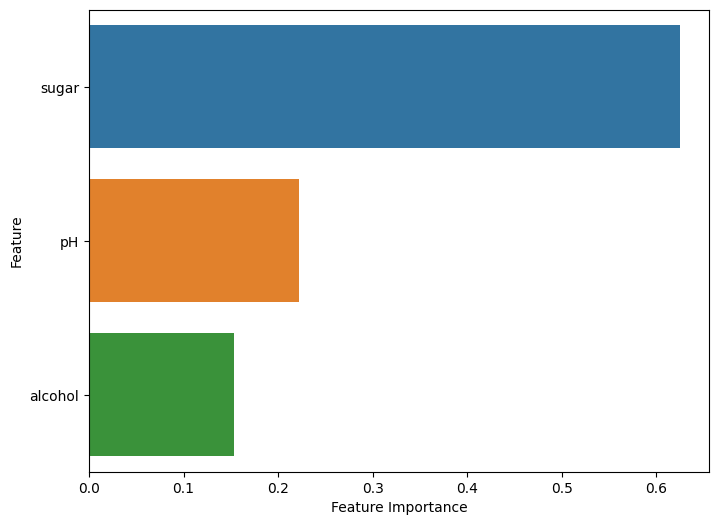

In [43]:
# 1. 데이터 로드
X = df.drop('class', axis=1)
y = df['class']

# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. RandomForest 모델 생성 및 학습
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_clf.fit(X_train, y_train)

# 4. 예측 및 정확도(accuracy score) 출력
rf_clf.score(X_train, y_train), rf_clf.score(X_test, y_test)
# 5. 특성 중요도 시각화
feat_impt_ser = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_impt_ser.values, y=feat_impt_ser.index, hue=feat_impt_ser.index)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

##### [한번 해보기] 인간행동인식 다중 분류
https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones 

사용자 행동 target class
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS
- SITTING
- STANDING
- LAYING

**HAR 특성 설명**

| **특성 유형**             | **설명**                                                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| **Mean와 Std**            | 'tBodyAcc-mean()-X', 'tBodyAcc-std()-Y'와 같은 특성은 시간 도메인에서의 신체 가속도에 대한 평균 및 표준편차 값 ('X', 'Y', 'Z'는 축을 의미) |
| **주파수 도메인 특징**     | 이름에 'f'로 시작하는 특성은 주파수 도메인에서 계산된 값 (예를 들어 'fBodyAcc-meanFreq()-X'는 신체 가속도 센서의 X축에서의 평균 주파수 값)    |
| **가속도와 자이로스코프 데이터** | 'tBodyAcc', 'tGravityAcc', 'tBodyGyro' 등의 특성은 신체 가속도, 중력 가속도, 자이로스코프 데이터                                                  |
| **Jerk 신호**             | 'tBodyAccJerk-mean()-X'와 같은 특성은 가속도의 변화율 (활동 간의 차이를 분류하는 데 중요한 역할)                                          |
| **Magnitude(크기)**       | 'tBodyAccMag-mean()', 'tGravityAccMag-std()'와 같은 특성은 특정 축 방향의 가속도 또는 자이로스코프 값을 합친 크기                                             |
| **FFT 변환 기반 특징**    | 주파수 도메인에서의 데이터 특성들은 Fourier 변환을 통해 얻어짐 (예를 들어, 'fBodyAccMag-mean()'은 주파수 도메인에서 가속도의 크기의 평균값)                  |
| **Angle(각도)**           | 'angle(X,gravityMean)'과 같은 특성은 특정 축과 중력 벡터 간의 각도 (중력과의 상대적인 위치 나타냄)                                                    |
| **레이블**                | 'Activity' 컬럼에는 각 행의 활동 레이블이 포함 (걷기, 계단 오르기, 계단 내리기, 앉기, 서기, 눕기 등의 활동 종류 있음)                                          |


In [48]:
df = pd.read_csv('./data/har_train.csv')
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [50]:
# 1. 데이터 로드
from operator import le
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler

X = df.drop('Activity', axis=1)
y = df['Activity']
# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 레이블 인코딩 (Activity를 숫자로 변환)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# 4. 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. RandomForest 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)    
rf_clf.fit(X_train, y_train_encoded)

# 6. 모델 예측
y_pred = rf_clf.predict(X_test)

# 7. 평가 (정확도 확인)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.973487423521414


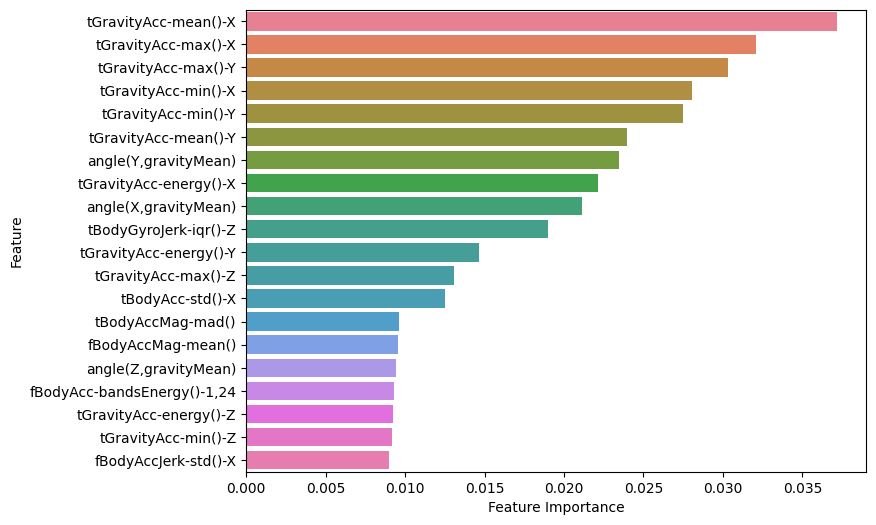

In [51]:
# 8. 중요도 상위 20개의 특성 시각화
feat_impt_ser = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_impt_ser.values, y=feat_impt_ser.index, hue=feat_impt_ser.index)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

### Boosting